# Titanic

#### Dependencies

In [644]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data Induction

In [645]:

fp = r'C:\Users\jamesPC\OneDrive\NW Data Science\Practical Machine Learning\Module 1 - Introduction to Machine Learning\datasets\titanic\train.csv'

with open(fp, 'r') as f:
    data = pd.read_csv(f)

    
data_original = data.copy()

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [646]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Ticket class demographics

In [647]:

data_for_grouping = data_original.copy()
data_for_grouping['Sex'] = data_for_grouping['Sex'].apply(lambda s: 1 if s == 'male' else 0)
data_for_grouping['Dummy_count'] = 1
data_grouped = data_for_grouping.groupby('Pclass').agg(np.sum)[['Survived', 'Sex', 'Age', 'Dummy_count']]

print('Total count of people: {}\n class 1: {}\n class 2: {}\n class 3: {}\n'.format(
    sum(data_grouped['Dummy_count']), data_grouped['Dummy_count'][1],
       data_grouped['Dummy_count'][2], data_grouped['Dummy_count'][3]))

data_grouped.apply(lambda r: r/data_grouped['Dummy_count'], axis = 0).drop('Dummy_count', axis = 1)


Total count of people: 891
 class 1: 216
 class 2: 184
 class 3: 491



,Survived,Sex,Age
Pclass,,,
1,0.629630,0.564815,32.923241
2,0.472826,0.586957,28.091467
3,0.242363,0.706721,18.177026


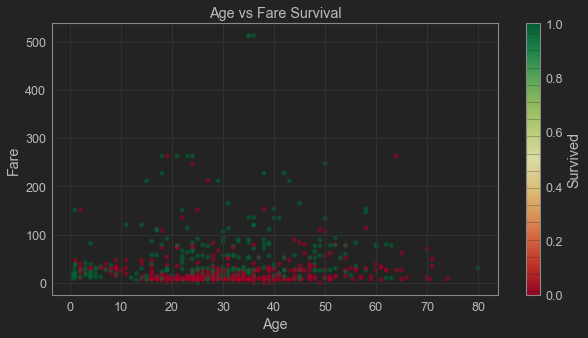

In [648]:
fig, ax = plt.subplots(figsize= (10,5))
data_original.plot(kind = 'scatter', x = 'Age', y = 'Fare', c = 'Survived', 
                   alpha = .6, cmap = plt.get_cmap('RdYlGn'),
                   title = 'Age vs Fare Survival', ax = ax, marker = 'o')

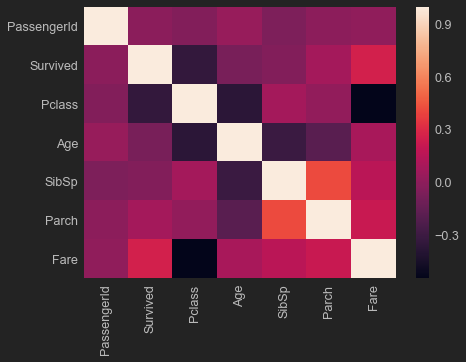

In [649]:
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize = (7,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax = ax)

In [650]:
data.isna().sum()/len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# Preprocess

In [651]:
from sklearn.model_selection import train_test_split

data = data.drop('Cabin', axis = 1)
data = data.drop('Name', axis = 1)
data = data.drop('Ticket', axis = 1)
data = data.dropna()
data_labels = data['Survived']
data = data.drop('Survived', axis = 1)
data = data.drop('PassengerId', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels)

In [652]:
data = X_train
data_labels = y_train

X_test = pd.DataFrame(X_test)

# Model


In [653]:
# data = data.drop('Cabin', axis = 1)
# data = data.drop('Name', axis = 1)
# data = data.drop('Ticket', axis = 1)
# data = data.dropna()




def type_split(df):
    """Takes a df and splits into numerical and categorical columns"""
    assert isinstance(df,pd.core.frame.DataFrame)
    types = df.dtypes
    numerical_columns = []
    categorical_columns = []    
    for i, col in enumerate(types):
        if str(col) in ['int64','float64','float32']:
            numerical_columns.append(types.index[i])
        else:
            categorical_columns.append(types.index[i])
    return df[numerical_columns], df[categorical_columns]


data_num, data_cat = type_split(data)
data_num_test , data_cat_test = type_split(X_test)

### Encoding

In [654]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories = 'auto')

data_onehot = onehot_encoder.fit_transform(data_cat)
test_onehot = onehot_encoder.fit_transform(data_cat_test)

print("OneHot encoding: ", data_onehot.shape, '\n',data_onehot[:5].toarray())
print('Categories: ', onehot_encoder.categories_)


OneHot encoding:  (534, 5) 
 [[0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]
Categories:  [array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


### Scaling

In [655]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns = list(data_num))

data_num_test_scaled = pd.DataFrame(scaler.fit_transform(data_num_test), columns = list(data_num_test))

### Bringing processed dataset back into one


In [656]:
cat_cols = pd.DataFrame(data_onehot.toarray(), columns = list(onehot_encoder.categories_[0])
                                                        +list(onehot_encoder.categories_[1]))

cat_cols_test = pd.DataFrame(test_onehot.toarray(), columns = list(onehot_encoder.categories_[0])
                                                             +list(onehot_encoder.categories_[1]))
data_prepared = pd.concat([data_num_scaled, cat_cols], axis = 1)

X_test_prepared = pd.concat([data_num_test_scaled, cat_cols_test], axis = 1)

In [657]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_features = 5, max_depth = 4)
tree_clf.fit(data_prepared,data_labels)

data_tree_predictions = tree_clf.predict(data_prepared)
tree_score = sum(data_tree_predictions==data_labels)/len(data_labels)

print("Decision Tree classification Accuracy: ", tree_score)

Decision Tree classification Accuracy:  0.8314606741573034


In [658]:
from sklearn.model_selection import cross_val_score


#Decision Tree
scores = cross_val_score(tree_clf, data_prepared, 
                         data_labels, scoring = 'accuracy',
                         cv = 25)

print('List of the cross validation tree accuracy Scores: \n', scores)
print('Mean of tree Scores: ', scores.mean())
print('Standard Deviation of tree Scores: ', scores.std())
print()

List of the cross validation tree accuracy Scores: 
 [0.86956522 0.82608696 0.77272727 0.72727273 0.86363636 0.72727273
 0.81818182 0.57142857 0.85714286 0.66666667 0.71428571 0.66666667
 0.80952381 0.76190476 1.         0.66666667 0.9047619  0.80952381
 0.76190476 0.76190476 0.66666667 0.80952381 0.66666667 0.85714286
 0.85714286]
Mean of tree Scores:  0.7765706757011105
Standard Deviation of tree Scores:  0.09410133860959775



# Testing

In [659]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_features = 5, max_depth = 4)
tree_clf.fit(X_test_prepared,y_test)

test_tree_predictions = tree_clf.predict(X_test_prepared)
tree_score = sum(test_tree_predictions==y_test)/len(y_test)

print("Decision Tree classification Accuracy: ", tree_score)

Decision Tree classification Accuracy:  0.8595505617977528
